In [1]:
#Starter File 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
from scipy.stats import linregress
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Import Data from CSVs

sp_500_div_yield_month = "S&P_500_div_yield_month.csv"
us_yield_curve = "US_Yield_Curve.csv"
sp_500_1m_futures = "S&P_500_1M_Futures.csv"

sp_500_div_yield_month = pd.read_csv(sp_500_div_yield_month)
us_yield_curve = pd.read_csv(us_yield_curve)
sp_500_1m_futures = pd.read_csv(sp_500_1m_futures)

sp_500_div_yield_month_df = pd.DataFrame(sp_500_div_yield_month)
us_yield_curve_df = pd.DataFrame(us_yield_curve)
sp_500_1m_futures_df = pd.DataFrame(sp_500_1m_futures)

print(sp_500_div_yield_month_df.shape)
print(us_yield_curve_df.shape)
print(sp_500_1m_futures_df.shape)

sp_500_1m_futures_df.head(5)

(1792, 2)
(7560, 13)
(9545, 9)


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,3/19/2020,NaN,NaN,NaN,NaN,10.7,2403.3,4764,108057
1,3/18/2020,NaN,NaN,NaN,NaN,81.5,2414.0,5300,108108
2,3/17/2020,NaN,NaN,NaN,NaN,79.3,2495.5,10460,109967
3,3/16/2020,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994
4,3/13/2020,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183


In [3]:
#Merge the Data using Outer method

sp_500_futures_vs_div_df = pd.merge(sp_500_1m_futures, sp_500_div_yield_month, on="Date", how="outer")
sp_500_futures_vs_div_df = pd.merge(sp_500_futures_vs_div_df, us_yield_curve_df, on="Date", how="outer")


sp_500_futures_vs_div_df = pd.DataFrame({
    "Date": sp_500_futures_vs_div_df["Date"],
    "S&P 500 Close Price": sp_500_futures_vs_div_df["Last"],
    "S&P 500 Dividend Yield": sp_500_futures_vs_div_df["Value"],
    "US 2-Yr Treasury Yield": sp_500_futures_vs_div_df["2 YR"],
    "US 10-Yr Treasury Yield": sp_500_futures_vs_div_df["10 YR"],
    "US 10Yr - 2Yr Treasury Yield": sp_500_futures_vs_div_df["10 YR"] - sp_500_futures_vs_div_df["2 YR"]
})

print(sp_500_futures_vs_div_df.shape)
sp_500_futures_vs_div_df.head(5)

(11043, 6)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US 2-Yr Treasury Yield,US 10-Yr Treasury Yield,US 10Yr - 2Yr Treasury Yield
0,3/19/2020,NaN,NaN,0.44,1.12,0.68
1,3/18/2020,NaN,NaN,0.54,1.18,0.64
2,3/17/2020,NaN,NaN,0.47,1.02,0.55
3,3/16/2020,NaN,NaN,0.36,0.73,0.37
4,3/13/2020,2695.0,NaN,0.49,0.94,0.45


In [4]:
#Sort the Data by Index

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df.sort_index(axis=0,ascending=False)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US 2-Yr Treasury Yield,US 10-Yr Treasury Yield,US 10Yr - 2Yr Treasury Yield
11042,9/1/1993,NaN,NaN,3.88,5.46,1.58
11041,4/5/1996,NaN,NaN,6.09,6.57,0.48
11040,4/2/1999,NaN,NaN,4.96,5.20,0.24
11039,9/13/2001,NaN,NaN,2.99,4.64,1.65
11038,9/14/2001,NaN,NaN,2.87,4.57,1.70


In [5]:
sp_500_futures_vs_div_df_sorted.dtypes

Date                             object
S&P 500 Close Price             float64
S&P 500 Dividend Yield          float64
US 2-Yr Treasury Yield          float64
US 10-Yr Treasury Yield         float64
US 10Yr - 2Yr Treasury Yield    float64
dtype: object

In [6]:
#Change Date type to "datetime" for further sorting by date range

sp_500_futures_vs_div_df_sorted["Date"] = pd.to_datetime(sp_500_futures_vs_div_df_sorted["Date"])
sp_500_futures_vs_div_df_sorted.dtypes

Date                            datetime64[ns]
S&P 500 Close Price                    float64
S&P 500 Dividend Yield                 float64
US 2-Yr Treasury Yield                 float64
US 10-Yr Treasury Yield                float64
US 10Yr - 2Yr Treasury Yield           float64
dtype: object

In [7]:
#Cleaning data to start at earliest common start date for calculations

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"].notna()]
column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["Date"] < "1990-01-31"].index
sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,US 2-Yr Treasury Yield,US 10-Yr Treasury Yield,US 10Yr - 2Yr Treasury Yield
7576,1990-01-31,330.50,3.28,8.28,8.43,0.15
7575,1990-02-01,330.10,NaN,8.28,8.42,0.14
7574,1990-02-02,332.50,NaN,8.37,8.50,0.13
7573,1990-02-05,333.40,NaN,8.37,8.53,0.16
7572,1990-02-06,330.25,NaN,8.42,8.57,0.15


In [8]:
#Calculate Daily Dividend Yield from the monthly value

total_yield_list = []
dollar_yield_list = []

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    yield_row = row["S&P 500 Dividend Yield"]
    if yield_row > 0:
        total_yield_list.append(round(yield_row, 2))
        current_yield = yield_row
        dollar_yield = (current_yield / 100) * price_row
        dollar_yield_list.append(round(dollar_yield, 2))
    else:
        percent_yield = dollar_yield / price_row *100
        total_yield_list.append(round(percent_yield, 2))
    
print(len(total_yield_list))   

7563


In [9]:
#Calculate daily percent returns

sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp500_percent_return = []
sp500_div_yield_return = []
treas_10yr_yield_return = []
treas_2yr_yield_return = []
treas_10yr2yr_yield_return = []

previous_price = 325.20
previous_div_yield = 3.28
previous_10yr_treas_yield = 8.51
previous_2yr_treas_yield = 8.30
previous_10yr2yr_treas_yield = 0.21

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_10yr_yield_row = row["US 10-Yr Treasury Yield"]
    treas_2yr_yield_row = row["US 2-Yr Treasury Yield"]
    treas_10yr2yr_yield_row = row["US 10Yr - 2Yr Treasury Yield"]
    
    
    daily_return_sp500 = (price_row - previous_price) / previous_price * 100
    sp500_percent_return.append(round(daily_return_sp500, 2))
    previous_price = price_row
    
    daily_return_div_yield = (div_yield_row - previous_div_yield) / previous_div_yield * 100
    sp500_div_yield_return.append(round(daily_return_div_yield, 2))
    previous_div_yield = div_yield_row
    
    daily_return_treas_10yr_yield = (treas_10yr_yield_row - previous_10yr_treas_yield) / previous_10yr_treas_yield * 100
    treas_10yr_yield_return.append(round(daily_return_treas_10yr_yield, 2))
    previous_10yr_treas_yield = treas_10yr_yield_row
    
    daily_return_treas_2yr_yield = (treas_2yr_yield_row - previous_2yr_treas_yield) / previous_2yr_treas_yield * 100
    treas_2yr_yield_return.append(round(daily_return_treas_2yr_yield, 2))
    previous_2yr_treas_yield = treas_2yr_yield_row
    
    daily_return_treas_10yr2yr_yield = (treas_10yr2yr_yield_row - previous_10yr2yr_treas_yield) / previous_10yr2yr_treas_yield * 100
    treas_10yr2yr_yield_return.append(round(daily_return_treas_10yr2yr_yield, 2))
    if treas_10yr2yr_yield_row == 0:
        previous_10yr2yr_treas_yield = 0.00000000000000000001
    else:
        previous_10yr2yr_treas_yield = treas_10yr2yr_yield_row


print(len(sp500_percent_return))
print(len(sp500_div_yield_return))
print(len(treas_10yr_yield_return))
print(len(treas_2yr_yield_return))
print(len(treas_10yr2yr_yield_return))

7563
7563
7563
7563
7563


In [10]:
#Insert daily percent returns into dataframe

sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp_500_futures_vs_div_df_sorted.insert(2, "S&P 500 % Return", sp500_percent_return)
sp_500_futures_vs_div_df_sorted.insert(4, "Div Yield % Return", sp500_div_yield_return)
sp_500_futures_vs_div_df_sorted.insert(6, "2-Yr Treasury Yield % Return", treas_2yr_yield_return)
sp_500_futures_vs_div_df_sorted.insert(8, "10-Yr Treasury Yield % Return", treas_10yr_yield_return)

sp_500_futures_vs_div_df_sorted["10Yr - 2Yr Treasury % Return"] = treas_10yr2yr_yield_return

sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,US 2-Yr Treasury Yield,2-Yr Treasury Yield % Return,US 10-Yr Treasury Yield,10-Yr Treasury Yield % Return,US 10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
7576,1990-01-31,330.50,1.63,3.28,0.00,8.28,-0.24,8.43,-0.94,0.15,-28.57
7575,1990-02-01,330.10,-0.12,3.28,0.00,8.28,0.00,8.42,-0.12,0.14,-6.67
7574,1990-02-02,332.50,0.73,3.26,-0.61,8.37,1.09,8.50,0.95,0.13,-7.14
7573,1990-02-05,333.40,0.27,3.25,-0.31,8.37,0.00,8.53,0.35,0.16,23.08
7572,1990-02-06,330.25,-0.94,3.28,0.92,8.42,0.60,8.57,0.47,0.15,-6.25


In [11]:
#Check for NaN values, and shape of dataframe

print(sp_500_futures_vs_div_df_sorted.isnull().sum())
print(sp_500_futures_vs_div_df_sorted.shape)


Date                               0
S&P 500 Close Price                0
S&P 500 % Return                   0
S&P 500 Dividend Yield             0
Div Yield % Return                 0
US 2-Yr Treasury Yield            64
2-Yr Treasury Yield % Return     128
US 10-Yr Treasury Yield           64
10-Yr Treasury Yield % Return    128
US 10Yr - 2Yr Treasury Yield      64
10Yr - 2Yr Treasury % Return     128
dtype: int64
(7563, 11)


In [12]:
#Drop NaN rows from dataframe

sp_500_futures_vs_div_df_sorted.dropna(inplace=True)
print(sp_500_futures_vs_div_df_sorted.isnull().sum())
print(sp_500_futures_vs_div_df_sorted.shape)


Date                             0
S&P 500 Close Price              0
S&P 500 % Return                 0
S&P 500 Dividend Yield           0
Div Yield % Return               0
US 2-Yr Treasury Yield           0
2-Yr Treasury Yield % Return     0
US 10-Yr Treasury Yield          0
10-Yr Treasury Yield % Return    0
US 10Yr - 2Yr Treasury Yield     0
10Yr - 2Yr Treasury % Return     0
dtype: int64
(7435, 11)


In [179]:
#Sort Dataframe by date range

analyze_dates_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "2017-07-30") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2020-03-20")]
analyze_dates_df.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,US 2-Yr Treasury Yield,2-Yr Treasury Yield % Return,US 10-Yr Treasury Yield,10-Yr Treasury Yield % Return,US 10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
664,2017-07-31,2469.7,-0.03,1.94,2.11,1.34,0.00,2.30,0.00,0.96,0.00
663,2017-08-01,2472.8,0.13,1.94,0.00,1.34,0.00,2.26,-1.74,0.92,-4.17
662,2017-08-02,2473.5,0.03,1.94,0.00,1.36,1.49,2.27,0.44,0.91,-1.09
661,2017-08-03,2471.5,-0.08,1.94,0.00,1.34,-1.47,2.24,-1.32,0.90,-1.10
660,2017-08-04,2472.7,0.05,1.94,0.00,1.36,1.49,2.27,1.34,0.91,1.11


In [180]:
#Calculate total returns for date range

sp500_tot_ret = []
sp500_divyld_tot_ret = []
treas_10yr_yld_tot_ret = []
treas_2yr_yld_tot_ret = []
treas_10yr2yr_yld_tot_ret = []
divyld_less_10yr_treas_tot_ret = []
divyld_less_2yr_treas_tot_ret = []
divyld_less_10yr2yr_treas_tot_ret = []


start_price = analyze_dates_df["S&P 500 Close Price"].iloc[0]
start_div_yield = analyze_dates_df["S&P 500 Dividend Yield"].iloc[0]
start_10yr_treas_yield = analyze_dates_df["US 10-Yr Treasury Yield"].iloc[0]
start_2yr_treas_yield = analyze_dates_df["US 2-Yr Treasury Yield"].iloc[0]
start_10yr2yr_treas_yield = analyze_dates_df["US 10Yr - 2Yr Treasury Yield"].iloc[0]

for index, row in analyze_dates_df.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_10yr_yield_row = row["US 10-Yr Treasury Yield"]
    treas_2yr_yield_row = row["US 2-Yr Treasury Yield"]
    treas_10yr2yr_yield_row = row["US 10Yr - 2Yr Treasury Yield"]
    
    
    tot_ret_sp500 = (price_row - start_price) / start_price * 100
    sp500_tot_ret.append(round(tot_ret_sp500, 2))
    
    tot_ret_div_yld = (div_yield_row - start_div_yield) / start_div_yield * 100
    sp500_divyld_tot_ret.append(round(tot_ret_div_yld, 2))
    
    tot_ret_10yr_treas_yield = (treas_10yr_yield_row - start_10yr_treas_yield) / start_10yr_treas_yield * 100
    treas_10yr_yld_tot_ret.append(round(tot_ret_10yr_treas_yield, 2))
    
    tot_ret_2yr_treas_yield = (treas_2yr_yield_row - start_2yr_treas_yield) / start_2yr_treas_yield * 100
    treas_2yr_yld_tot_ret.append(round(tot_ret_2yr_treas_yield, 2))
    
    tot_ret_10yr2yr_treas_yield = (treas_10yr2yr_yield_row - start_10yr2yr_treas_yield) / start_10yr2yr_treas_yield * 100
    treas_10yr2yr_yld_tot_ret.append(round(tot_ret_10yr2yr_treas_yield, 2))
    
    divyld_less_10yr_treas = tot_ret_div_yld - tot_ret_10yr_treas_yield
    divyld_less_10yr_treas_tot_ret.append(round(divyld_less_10yr_treas, 2))
    
    divyld_less_2yr_treas = tot_ret_div_yld - tot_ret_2yr_treas_yield
    divyld_less_2yr_treas_tot_ret.append(round(divyld_less_2yr_treas, 2))
    
    divyld_less_10yr2yr_treas = tot_ret_div_yld - tot_ret_10yr2yr_treas_yield
    divyld_less_10yr2yr_treas_tot_ret.append(round(divyld_less_10yr2yr_treas, 2))
    

print(start_price)
print(start_div_yield)
print(start_10yr_treas_yield)
print(start_2yr_treas_yield)
print(start_10yr2yr_treas_yield)
analyze_dates_df.head(5)

2469.7
1.94
2.3
1.34
0.9599999999999997


,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,US 2-Yr Treasury Yield,2-Yr Treasury Yield % Return,US 10-Yr Treasury Yield,10-Yr Treasury Yield % Return,US 10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
664,2017-07-31,2469.7,-0.03,1.94,2.11,1.34,0.00,2.30,0.00,0.96,0.00
663,2017-08-01,2472.8,0.13,1.94,0.00,1.34,0.00,2.26,-1.74,0.92,-4.17
662,2017-08-02,2473.5,0.03,1.94,0.00,1.36,1.49,2.27,0.44,0.91,-1.09
661,2017-08-03,2471.5,-0.08,1.94,0.00,1.34,-1.47,2.24,-1.32,0.90,-1.10
660,2017-08-04,2472.7,0.05,1.94,0.00,1.36,1.49,2.27,1.34,0.91,1.11


In [181]:
analyze_metrics_df = pd.DataFrame({
    "Date": analyze_dates_df["Date"],
    "S&P Price": analyze_dates_df["S&P 500 Close Price"],
    "S&P Div Yld": analyze_dates_df["S&P 500 Dividend Yield"],
    #"2Yr Treas Yld": analyze_dates_df["US 2-Yr Treasury Yield"],
    #"10Yr Treas Yld": analyze_dates_df["US 10-Yr Treasury Yield"],
    "10Yr2Yr Treas Yld": analyze_dates_df["US 10-Yr Treasury Yield"] - analyze_dates_df["US 2-Yr Treasury Yield"],
    #"Div Yld - 2Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] - analyze_dates_df["US 2-Yr Treasury Yield"],
    #"Div Yld - 10Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] - analyze_dates_df["US 10-Yr Treasury Yield"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] / analyze_dates_df["US 10Yr - 2Yr Treasury Yield"],
    "S&P Tot Ret": sp500_tot_ret,
    "S&P Div Yld Tot Ret": sp500_divyld_tot_ret,
    #"2Yr Treas Yld Tot Ret": treas_2yr_yld_tot_ret,
    #"10Yr Treas Yld Tot Ret": treas_10yr_yld_tot_ret,
    "10Yr2Yr Treas Yld Tot Ret": treas_10yr2yr_yld_tot_ret,
    #"Div Yld Tot Ret - 2Yr Treas Yld Tot Ret": divyld_less_2yr_treas_tot_ret,
    #"Div Yld Tot Ret - 10Yr Treas Yld Tot Ret": divyld_less_10yr_treas_tot_ret,
    "Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret": divyld_less_10yr2yr_treas_tot_ret,
    "S&P Daily Ret": analyze_dates_df["S&P 500 % Return"],
    #"S&P Div Yld Daily Ret": analyze_dates_df["Div Yield % Return"],
    #"US 2Yr Treas Yld Daily Ret": analyze_dates_df["2-Yr Treasury Yield % Return"],
    #"US 10Yr Treas Yld Daily Ret": analyze_dates_df["10-Yr Treasury Yield % Return"],
    "US 10Yr2Yr Treas Yld Daily Ret": analyze_dates_df["10Yr - 2Yr Treasury % Return"],    
    #"Div Yld Daily Ret - 2Yr Treas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["2-Yr Treasury Yield % Return"],
    #"Div Yld Daily Ret - 10Yr Treas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["10-Yr Treasury Yield % Return"],
    "Div Yld Daily Ret - 10Yr2YrTreas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["10Yr - 2Yr Treasury % Return"]
})



analyze_metrics_df = analyze_metrics_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_df.isnull().sum())
analyze_metrics_df.dropna(inplace=True)
print(analyze_metrics_df.isnull().sum())
print(analyze_metrics_df.shape)
analyze_metrics_df.head()
#print(analyze_metrics_df.shape)

Date                                              0
S&P Price                                         0
S&P Div Yld                                       0
10Yr2Yr Treas Yld                                 0
Div Yld / 10Yr2Yr Treas Yld                       3
S&P Tot Ret                                       0
S&P Div Yld Tot Ret                               0
10Yr2Yr Treas Yld Tot Ret                         0
Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret       0
S&P Daily Ret                                     0
US 10Yr2Yr Treas Yld Daily Ret                    0
Div Yld Daily Ret - 10Yr2YrTreas Yld Daily Ret    0
dtype: int64
Date                                              0
S&P Price                                         0
S&P Div Yld                                       0
10Yr2Yr Treas Yld                                 0
Div Yld / 10Yr2Yr Treas Yld                       0
S&P Tot Ret                                       0
S&P Div Yld Tot Ret                               0

,Date,S&P Price,S&P Div Yld,10Yr2Yr Treas Yld,Div Yld / 10Yr2Yr Treas Yld,S&P Tot Ret,S&P Div Yld Tot Ret,10Yr2Yr Treas Yld Tot Ret,Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret,S&P Daily Ret,US 10Yr2Yr Treas Yld Daily Ret,Div Yld Daily Ret - 10Yr2YrTreas Yld Daily Ret
664,2017-07-31,2469.7,1.94,0.96,2.020833,0.00,0.0,0.00,0.00,-0.03,0.00,2.11
663,2017-08-01,2472.8,1.94,0.92,2.108696,0.13,0.0,-4.17,4.17,0.13,-4.17,4.17
662,2017-08-02,2473.5,1.94,0.91,2.131868,0.15,0.0,-5.21,5.21,0.03,-1.09,1.09
661,2017-08-03,2471.5,1.94,0.90,2.155556,0.07,0.0,-6.25,6.25,-0.08,-1.10,1.10
660,2017-08-04,2472.7,1.94,0.91,2.131868,0.12,0.0,-5.21,5.21,0.05,1.11,-1.11


C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


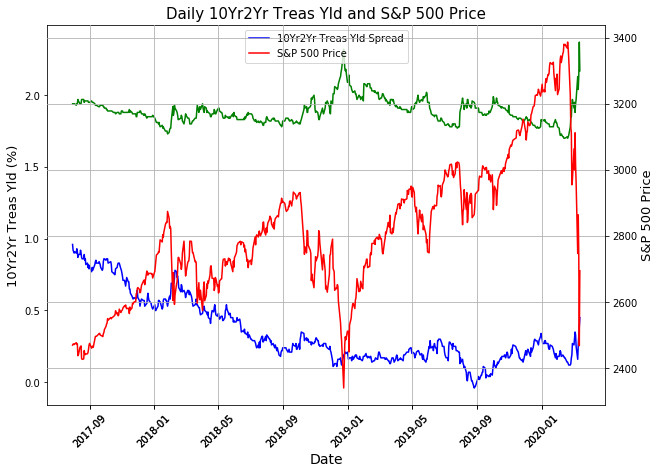

In [182]:
fig1 = plt.figure(figsize=(10,7))

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
plt.ylabel("10Yr2Yr Treas Yld (%)", size=13)

ax3 = fig1.add_subplot(111)
line3 = ax3.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Div Yld"], "g-")
plt.xticks(rotation=45)

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)


ax1.legend((line1+line2+line3), ("10Yr2Yr Treas Yld Spread", "S&P 500 Price"), loc="upper center")
plt.title("Daily 10Yr2Yr Treas Yld and S&P 500 Price", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()



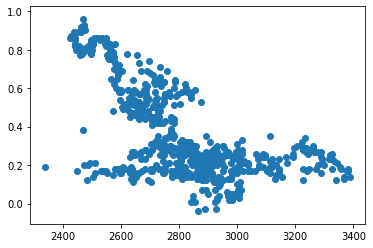

-0.6250113471219122


In [183]:
plt.scatter(analyze_metrics_df["S&P Price"], analyze_metrics_df["10Yr2Yr Treas Yld"])
plt.show()
correlation = st.pearsonr(analyze_metrics_df["S&P Price"], analyze_metrics_df["10Yr2Yr Treas Yld"])[0]
print(correlation)

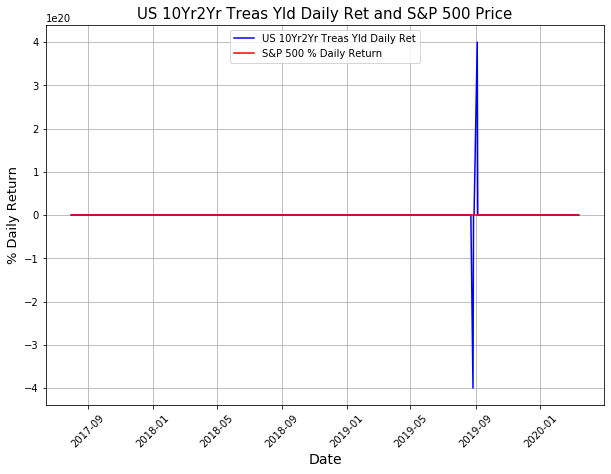

In [184]:
fig2 = plt.figure(figsize=(10,7))

plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["US 10Yr2Yr Treas Yld Daily Ret"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Daily Ret"], "r-")
plt.xticks(rotation=45)
plt.ylabel("% Daily Return", size=13)
plt.legend((line1+line2), ("US 10Yr2Yr Treas Yld Daily Ret", "S&P 500 % Daily Return"), loc=("upper center"))
plt.title("US 10Yr2Yr Treas Yld Daily Ret and S&P 500 Price", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

#ax1 = fig2.add_subplot(111)
#line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["US 10Yr2Yr Treas Yld Daily Ret"], "b-")
#plt.xticks(rotation=45)
#plt.ylim(-20, 15)
#plt.ylabel("% Daily Return", size=13)



#ax2 = fig2.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Daily Ret"], "r-")
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#plt.xticks(rotation=45)
#plt.ylim(-20, 15)
#plt.ylabel("S&P 500 % Daily Return", size=13)


#ax1.legend((line1+line2), ("US 10-Yr Treasury Yield % Daily Return", "S&P 500 % Daily Return"), loc=("upper left"))
#plt.title("US 10Yr2Yr Treas Yld Daily Ret and S&P 500 Price", size=15)
#plt.xlabel("Date", size=14)
#plt.grid(alpha=1)
#plt.show()

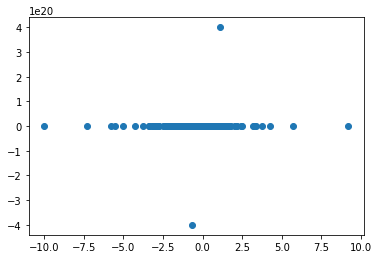

0.04231392136111594


In [185]:
plt.scatter(analyze_metrics_df["S&P Daily Ret"], analyze_metrics_df["US 10Yr2Yr Treas Yld Daily Ret"])
plt.show()
correlation = st.pearsonr(analyze_metrics_df["S&P Daily Ret"], analyze_metrics_df["US 10Yr2Yr Treas Yld Daily Ret"])[0]
print(correlation)

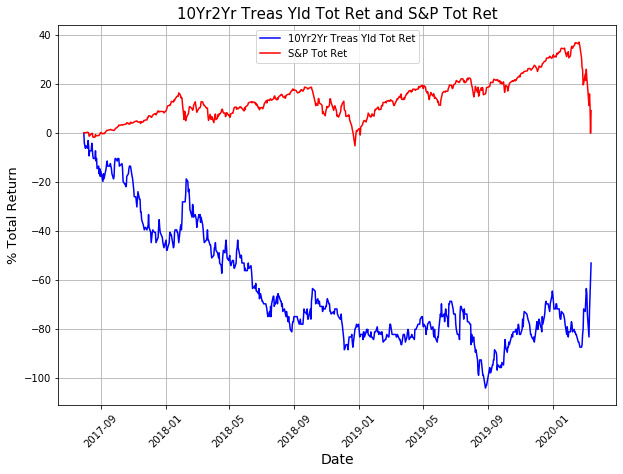

In [186]:
fig2 = plt.figure(figsize=(10,7))

plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["10Yr2Yr Treas Yld Tot Ret"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Tot Ret"], "r-")
plt.xticks(rotation=45)
plt.ylabel("% Total Return", size=13)
plt.legend((line1+line2), ("10Yr2Yr Treas Yld Tot Ret", "S&P Tot Ret"), loc=("upper center"))
plt.title("10Yr2Yr Treas Yld Tot Ret and S&P Tot Ret", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

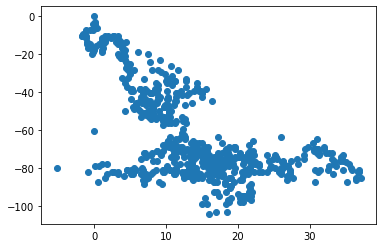

-0.6250016541351232


In [187]:
plt.scatter(analyze_metrics_df["S&P Tot Ret"], analyze_metrics_df["10Yr2Yr Treas Yld Tot Ret"])
plt.show()
correlation = st.pearsonr(analyze_metrics_df["S&P Tot Ret"], analyze_metrics_df["10Yr2Yr Treas Yld Tot Ret"])[0]
print(correlation)

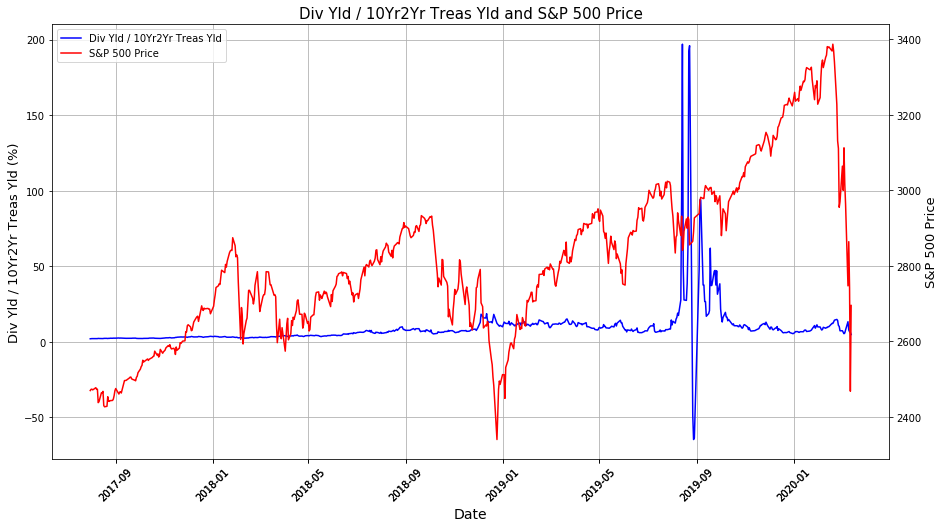

In [192]:
fig1 = plt.figure(figsize=(15, 8))

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
#plt.ylim(-2.5, 3)
plt.ylabel("Div Yld / 10Yr2Yr Treas Yld (%)", size=13)
plt.grid(alpha=1)

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)


ax1.legend((line1+line2), ("Div Yld / 10Yr2Yr Treas Yld", "S&P 500 Price"), loc="upper left")
plt.title("Div Yld / 10Yr2Yr Treas Yld and S&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

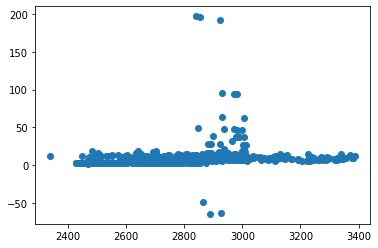

0.16156534838128048


In [189]:
plt.scatter(analyze_metrics_df["S&P Price"], analyze_metrics_df["Div Yld / 10Yr2Yr Treas Yld"])
plt.show()
correlation = st.pearsonr(analyze_metrics_df["S&P Price"], analyze_metrics_df["Div Yld / 10Yr2Yr Treas Yld"])[0]
print(correlation)

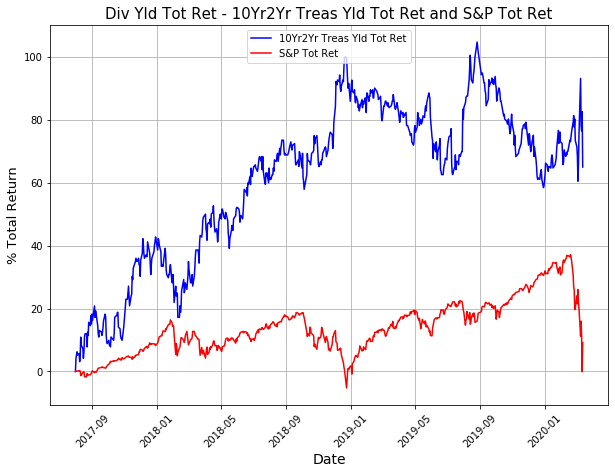

In [190]:
fig2 = plt.figure(figsize=(10,7))

plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Tot Ret"], "r-")
plt.xticks(rotation=45)
plt.ylabel("% Total Return", size=13)
plt.legend((line1+line2), ("10Yr2Yr Treas Yld Tot Ret", "S&P Tot Ret"), loc=("upper center"))
plt.title("Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret and S&P Tot Ret", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

KeyError: 'US Treasury Yield'

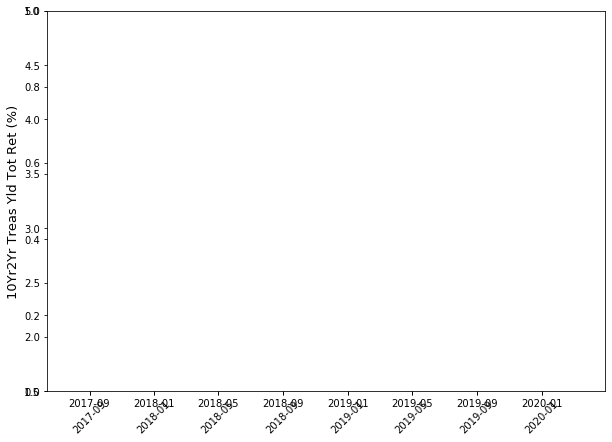

In [191]:
fig3 = plt.figure(figsize=(10,7))

ax1 = fig3.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["10Yr2Yr Treas Yld Tot Ret"], "g-")
plt.xticks(rotation=45)
plt.ylim(1.5,5)
plt.ylabel("10Yr2Yr Treas Yld Tot Ret (%)", size=13)


ax2 = fig3.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["US Treasury Yield"], "b-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(1.5,5)
plt.ylabel("US Treasury Yield", size=13)


ax1.legend((line1+line2), ("S&P 500 Dividend Yield", "US 10-Yr Treasury Yield (%)"), loc="upper center")
plt.title("Daily S&P 500 Dividend Yield and US 10-Yr Treasury Yield", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
fig4 = plt.figure(figsize=(10,7))

ax1 = fig4.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Dividend Yield Daily Return"], "g-")
plt.xticks(rotation=45)
plt.ylim(-20, 15)
plt.ylabel("Dividend Yield % Daily Return", size=13)


ax2 = fig4.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["US Treasury Yield Daily Return"], "b-", alpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(-20, 15)
plt.ylabel("US Treasury Yield % Daily Return", size=13)


ax1.legend((line1+line2), ("S&P 500 Dividend Yield", "US 10-Yr Treasury Yield (%)"), loc=("upper left"))
plt.title("Percent Daily Return for \nS&P 500 Dividend Yield and US 10-Yr Treasury Yield", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
plt.scatter(analyze_metrics_df["S&P 500 Dividend Yield Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Dividend Yield Daily Return"], analyze_metrics_df["US Treasury Yield Daily Return"])[0]
print(correlation)

In [ ]:
fig5 = plt.figure(figsize=(10,7))

ax1 = fig5.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld Daily Return - Treas Yld Daily Return"], "y-")
plt.xticks(rotation=45)
plt.ylim(-16, 20)
plt.ylabel("Div Yld % Daily Return - Treas Yld % Daily Return", size=13)


ax2 = fig5.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Daily Return"], "r-", alpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(-16, 20)
plt.ylabel("S&P 500 Price", size=13)


ax1.legend((line1+line2), ("US 10-Yr Treasury Yield % Daily Return", "S&P 500 % Daily Return"), loc=("upper left"))
plt.title("Percent Daily Return for \nDiv Yld % Daily Return - Treas Yld % Daily Return \nand S&P 500 Price", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
plt.scatter(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["Div Yld Daily Return - Treas Yld Daily Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Daily Return"], analyze_metrics_df["Div Yld Daily Return - Treas Yld Daily Return"])[0]
print(correlation)

In [ ]:
fig6 = plt.figure(figsize=(10,7))

ax1 = fig6.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treasury Yld Total Return"], "b-")
plt.xticks(rotation=45)
plt.ylim(-60, 5)
plt.ylabel("Treasury Yld % Total Return", size=13)




ax2 = fig6.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Total Return"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(-60, 5)
plt.ylabel("S&P 500 % Total Return", size=13)


ax1.legend((line1+line2), ("US 10-Yr Treasury Yield % Total Return", "S&P 500 % Total Return"), loc="upper center")
plt.title("Percent Daily Return for \nTreasury Yld % Total Return \nand S&P 500 % Total Return", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
plt.scatter(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treasury Yld Total Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Treasury Yld Total Return"])[0]
print(correlation)

In [ ]:
fig6 = plt.figure(figsize=(10,7))

ax1 = fig6.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 DivYld Total Return"], "g-")
plt.xticks(rotation=45)
plt.ylim(-60, 150)
plt.ylabel("S&P 500 DivYld % Total Return", size=13)


ax2 = fig6.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treasury Yld Total Return"], "b-", alpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(-60, 150)
plt.ylabel("Treasury Yld % Total Return", size=13)


ax1.legend((line1+line2), ("S&P 500 DivYld % Total Return", "Treasury Yld % Total Return"), loc="upper center")
plt.title("Percent Daily Return for \nS&P 500 DivYld % Total Return \nand Treasury Yld % Total Return", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
plt.scatter(analyze_metrics_df["S&P 500 DivYld Total Return"], analyze_metrics_df["Treasury Yld Total Return"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 DivYld Total Return"], analyze_metrics_df["Treasury Yld Total Return"])[0]
print(correlation)

In [ ]:
fig7 = plt.figure(figsize=(10,7))

ax1 = fig7.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld Tot Ret - Treas Yld Tot Ret"], "y-")
plt.xticks(rotation=45)
plt.ylim(-60, 200)
plt.ylabel("Div Yld % Tot Ret - Treas Yld % Tot Ret", size=13)


ax2 = fig7.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Total Return"], "r-", alpha=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylim(-60, 200)
plt.ylabel("S&P 500 % Total Return", size=13)


ax1.legend((line1+line2), ("Div Yld % Tot Ret - Treas Yld % Tot Ret", "S&P 500 % Total Return"), loc="upper center")
plt.title("Percent Daily Return for \nDiv Yld % Tot Ret - Treas Yld % Tot Ret \nand S&P 500 % Total Return", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

In [ ]:
plt.scatter(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Div Yld Tot Ret - Treas Yld Tot Ret"])
plt.show()

correlation = st.pearsonr(analyze_metrics_df["S&P 500 Total Return"], analyze_metrics_df["Div Yld Tot Ret - Treas Yld Tot Ret"])[0]
print(correlation)

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 Total Return"], "r-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P 500 DivYld Total Return"], "g-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Treasury Yld Total Return"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld Tot Ret - Treas Yld Tot Ret"], "y-")
plt.grid(alpha=3)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld - Treas Yld"], "y-")
plt.grid(alpha=3)
plt.show()